In [1]:
import random
import math
from PIL import Image

# Fix 1: Convert perm to a list
perm = list(range(256))
random.shuffle(perm)
perm += perm

dirs = [(math.cos(a * 2.0 * math.pi / 256),
         math.sin(a * 2.0 * math.pi / 256))
         for a in range(256)]

def noise(x, y, per):
    def surflet(gridX, gridY):
        distX, distY = abs(x-gridX), abs(y-gridY)
        polyX = 1 - 6*distX**5 + 15*distX**4 - 10*distX**3
        polyY = 1 - 6*distY**5 + 15*distY**4 - 10*distY**3
        hashed = perm[perm[int(gridX)%per] + int(gridY)%per]
        grad = (x-gridX)*dirs[hashed][0] + (y-gridY)*dirs[hashed][1]
        return polyX * polyY * grad
    intX, intY = int(x), int(y)
    return (surflet(intX+0, intY+0) + surflet(intX+1, intY+0) +
            surflet(intX+0, intY+1) + surflet(intX+1, intY+1))

def fBm(x, y, per, octs):
    val = 0
    for o in range(octs):
        val += 0.5**o * noise(x*2**o, y*2**o, per*2**o)
    return val

size, freq, octs, data = 256, 1/32.0, 5, []
for y in range(size):
    for x in range(size):
        data.append(fBm(x*freq, y*freq, int(size*freq), octs))

# Fix 2: Normalize data to range [0, 255]
min_val, max_val = min(data), max(data)
data = [(val - min_val) / (max_val - min_val) * 255 for val in data]

# Fix 3: Convert data to integers
data = list(map(int, data))

im = Image.new("L", (size, size))
im.putdata(data)
im.save("seamless_noise.png")

In [2]:
# Scale the image to 200x200

im = Image.open("seamless_noise.png")
im_resized = im.resize((201, 201))
im_resized.save("seamless_noise_resized.png")

# Convert the image data to a numpy array
import numpy as np
im_np = np.array(im_resized)

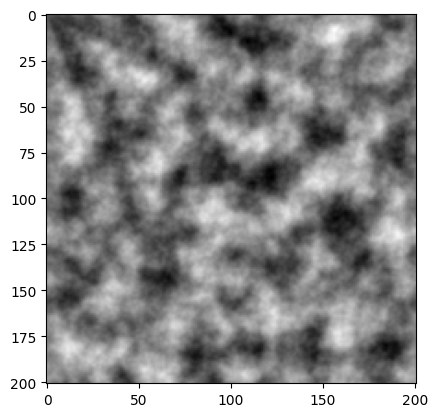

In [3]:
import matplotlib.pyplot as plt
plt.imshow(im_resized, cmap='gray')
plt.show()

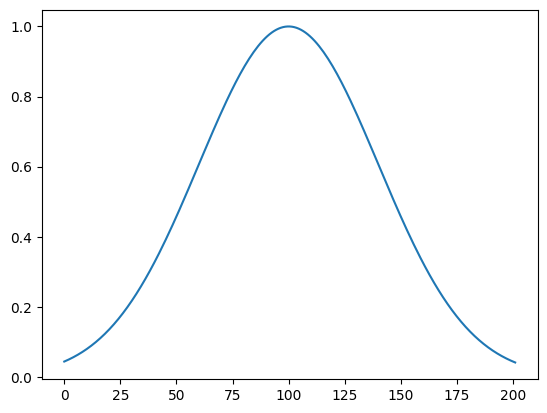

In [4]:
# Create a vector of of 200 values with a gaussian centered at 100 and a standard deviation of 10
import numpy as np
sigma = 40
x = np.linspace(0, 201, 201)
y = np.exp(-0.5 * ((x - 100) / sigma) ** 2)
plt.plot(x, y)
plt.show()

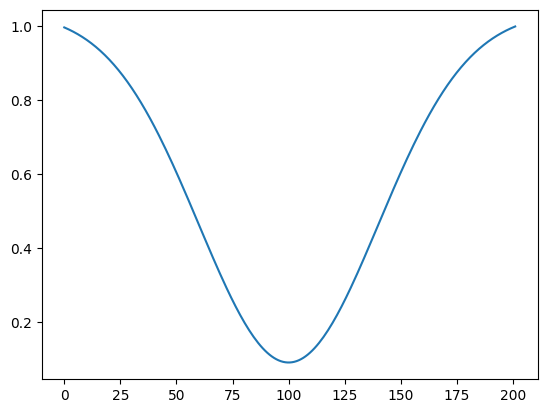

In [5]:
# Invert the guassian, add 0.1 at the minimum value and normalize to [0, 1]
y = 1 - (y - min(y)) / (max(y) - min(y))
y += 0.1
y /= max(y)
plt.plot(x, y)
plt.show()

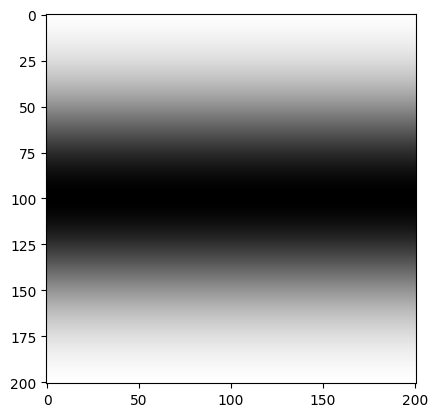

In [6]:
# Extend the vector to a 2D matrix
x, y = np.meshgrid(x, y)
plt.imshow(y, cmap='gray')
plt.show()

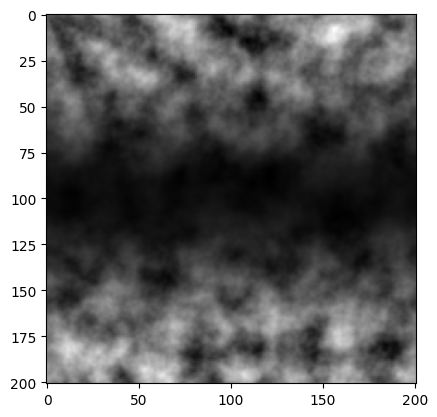

In [7]:
# Multiply the noise by the gaussian
data_resized = im_np * y
plt.imshow(data_resized, cmap='gray')
plt.show()

In [8]:
# Normalize the data to [0, 1]
data_resized = (data_resized - min(data_resized.flatten())) / (max(data_resized.flatten()) - min(data_resized.flatten()))

# Save the image
im_resized = Image.fromarray((data_resized * 255).astype('uint8'))
im_resized.save("seamless_noise_resized_gaussian.png")